CSV file created successfully.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sender     3 non-null      object
 1   receiver   3 non-null      object
 2   subject    3 non-null      object
 3   timestamp  3 non-null      object
 4   content    3 non-null      object
dtypes: object(5)
memory usage: 252.0+ bytes
None


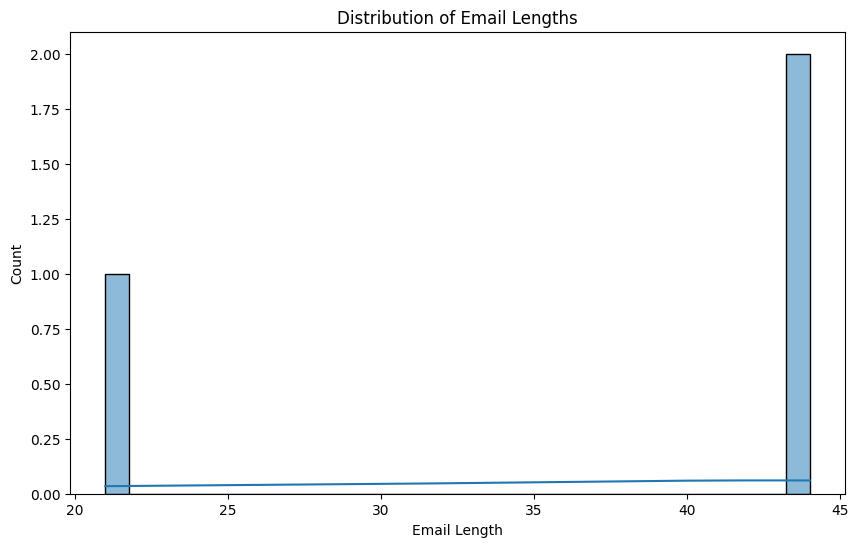

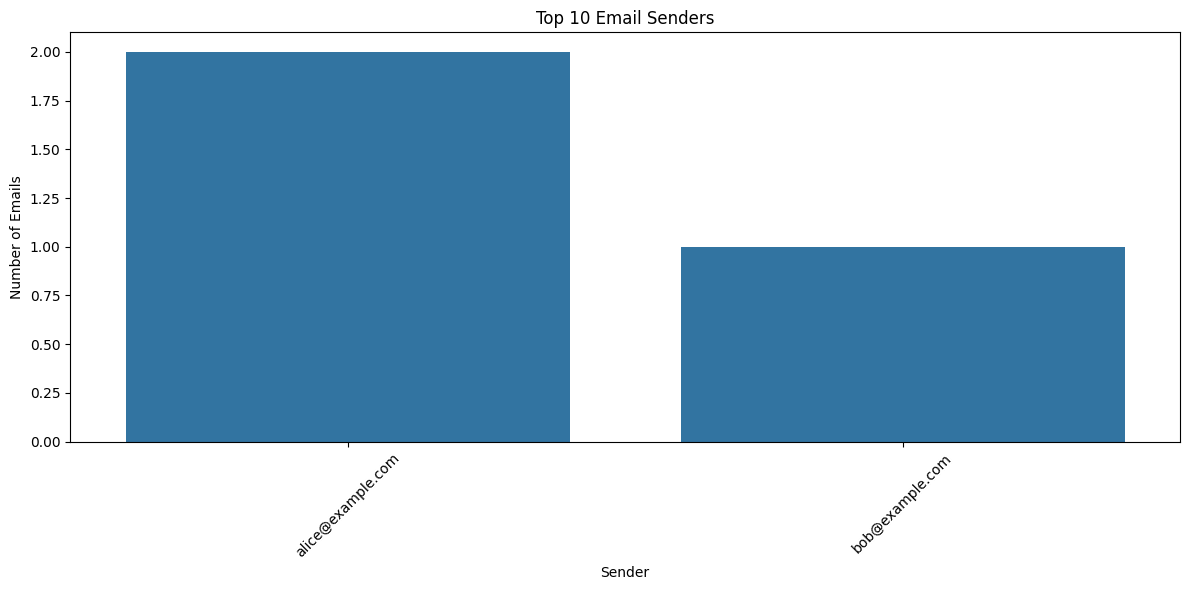

C:\Users\harkee\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


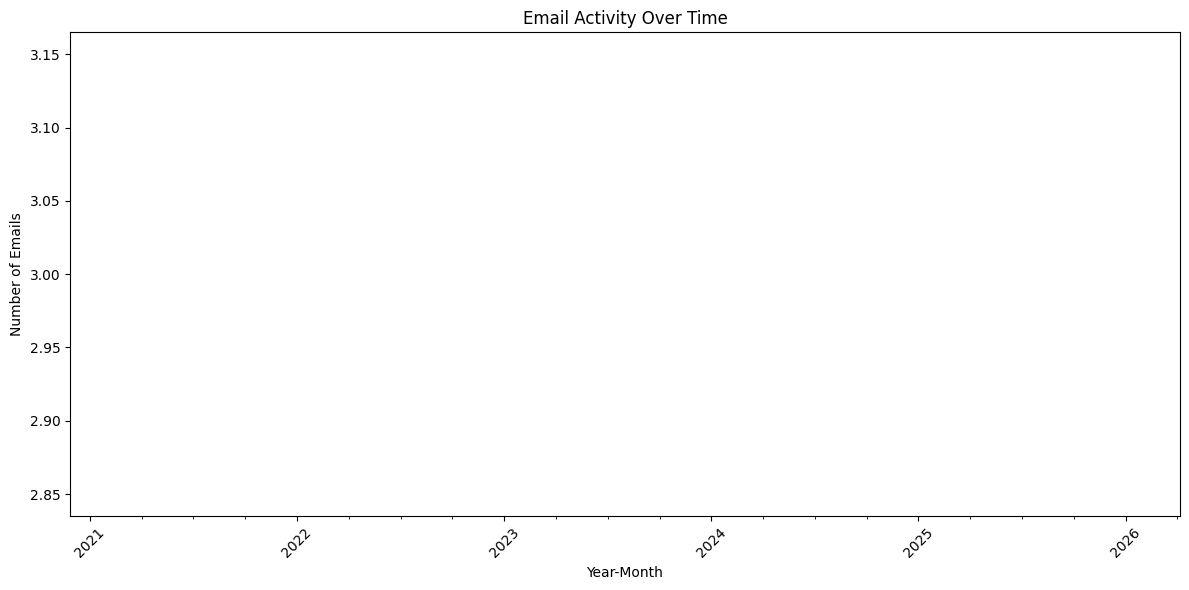

In [2]:
# Step 1: Create and save the DataFrame
import pandas as pd

data = {
    'sender': ['alice@example.com', 'bob@example.com', 'alice@example.com'],
    'receiver': ['bob@example.com', 'alice@example.com', 'carol@example.com'],
    'subject': ['Hello', 'Meeting Reminder', 'Project Update'],
    'timestamp': ['2023-08-01 10:00:00', '2023-08-02 14:30:00', '2023-08-03 09:15:00'],
    'content': [
        'Hi Bob,\n\nHow are you?', 
        'Hi Alice,\n\nDon\'t forget the meeting at 3 PM.',
        'Hi Carol,\n\nHere\'s the latest project update.'
    ]
}

df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.to_csv('emails.csv', index=False)
print("CSV file created successfully.")

# Step 2: Load and perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("emails.csv")
print(df.info())

# Preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.dropna(inplace=True)
df['email_length'] = df['content'].apply(len)

# 1. Distribution of Email Lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='email_length', bins=30, kde=True)
plt.xlabel('Email Length')
plt.ylabel('Count')
plt.title('Distribution of Email Lengths')
plt.show()

# 2. Top 10 Email Senders
top_senders = df['sender'].value_counts()[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_senders.index, y=top_senders.values)
plt.xticks(rotation=45)
plt.xlabel('Sender')
plt.ylabel('Number of Emails')
plt.title('Top 10 Email Senders')
plt.tight_layout()
plt.show()

# 3. Email Activity Over Time
df['year_month'] = df['timestamp'].dt.to_period('M')
email_activity = df.groupby('year_month').size()
plt.figure(figsize=(12, 6))
email_activity.plot(kind='line')
plt.xlabel('Year-Month')
plt.ylabel('Number of Emails')
plt.title('Email Activity Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
